## **Davidson Tweets Dataset**

In [2]:
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [ ]:
data = pd.read_csv("/davidson_tweets_2017_edited.csv")

In [ ]:
data = pd.DataFrame(data)
data.head()

,Unnamed: 0,hate_speech,offensive_language,neither,tweet,class
0,0,0,0,3,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,1,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,0,2,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,tweet,class
0,As a woman you should n' about cleaning up yo...,2
1,boy dats cold tyga dwn bad for cuffin dat hoe...,1
2,Dawg You ever fuck a bitch and she start to ...,1
3,she look like a tranny,1
4,The shit you hear about me might be true or i...,1


In [ ]:
# data.describe()

In [ ]:
# data.info()

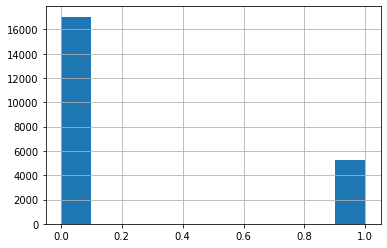

In [ ]:
data['label'].hist()

In [ ]:
data = data.drop(columns=['hate_speech', 'offensive_language', 'neither'])
data.head()

,Unnamed: 0,tweet,class
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# data['tweet'] = data.tweet.str.lower()

In [ ]:
def remove_username(tweets):
    tweet_list = []
    for tweet in tweets:
        tweet = re.sub('@[\w]+','',tweet)
        tweet_list.append(tweet)
    return tweet_list

In [ ]:
data['tweet'] = remove_username(data['tweet'])
data.head()

,Unnamed: 0,tweet,class
0,0,!!! RT : As a woman you shouldn't complain abo...,2
1,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...,1
2,2,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...,1
3,3,!!!!!!!!! RT : she look like a tranny,1
4,4,!!!!!!!!!!!!! RT : The shit you hear about me ...,1


In [ ]:
data['tweet'][55]

'"&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;: Gay niggas couldn\'t wait to act like bitches tonight"'

In [ ]:
from bs4 import BeautifulSoup
from html import unescape

def special_char(text):
    temp = [BeautifulSoup(unescape(s), 'lxml').text for s in text]
    # tweets = [str(x) for x in temp]
    # soup = BeautifulSoup(unescape(s), 'lxml')
    # print(soup.text)
    return temp

data['tweet'] = special_char(data['tweet'])
data.head(20)

,Unnamed: 0,tweet,class
0,0,!!! RT : As a woman you shouldn't complain abo...,2
1,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...,1
2,2,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...,1
3,3,!!!!!!!!! RT : she look like a tranny,1
4,4,!!!!!!!!!!!!! RT : The shit you hear about me ...,1
5,5,"!!!!!!!!!!!!!!!!!!"": The shit just blows me..c...",1
6,6,"!!!!!!"": I can not just sit up and HATE on ano...",1
7,7,!!!!“: cause I'm tired of you big bitches comi...,1
8,8,""" & you might not get ya bitch back & thats th...",1
9,9,""" :hobbies include: fighting Mariam""\n\nbitch",1


In [ ]:
import emoji
def emoji_to_text(text): 
    text_list = [emoji.demojize(x) for x in text]
    return text_list

data['tweet'] = emoji_to_text(data['tweet'])

In [ ]:
nltk.download('punkt')
from textblob import TextBlob

def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

data['tweet'] = [form_sentence(tweet) for tweet in data['tweet']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head(20)

,Unnamed: 0,tweet,class
0,0,RT As a woman you should n't complain about cl...,2
1,1,RT boy dats cold tyga dwn bad for cuffin dat h...,1
2,2,RT Dawg RT You ever fuck a bitch and she start...,1
3,3,RT she look like a tranny,1
4,4,RT The shit you hear about me might be true or...,1
5,5,The shit just blows me..claim you so faithful ...,1
6,6,I can not just sit up and HATE on another bitc...,1
7,7,“ cause I 'm tired of you big bitches coming f...,1
8,8,you might not get ya bitch back thats that,1
9,9,hobbies include fighting Mariam bitch,1


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    # clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(tweet_list)
    # clean_mess = [word for word in clean_s.split()]
    clean = re.sub(r"\S*https?:\S*", "", clean_s)
    clean = re.sub(r"\S*http?:\S*", "", clean)
    clean = re.sub('RT', '', clean)
    clean = re.sub('amp', '', clean)
    clean = re.sub('http', '', clean)
    clean = re.sub(r"t.co\S+", "", clean)
    return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# nltk.download('wordnet')
# from nltk.stem.wordnet import WordNetLemmatizer

# def normalization(tweet_list):
#         lem = WordNetLemmatizer()
#         normalized_tweet = []
#         for word in tweet_list:
#             normalized_text = lem.lemmatize(word,'v')
#             normalized_tweet.append(normalized_text)
#         return normalized_tweet

In [ ]:
data.head()

,Unnamed: 0,tweet,class
0,0,RT As a woman you should n't complain about cl...,2
1,1,RT boy dats cold tyga dwn bad for cuffin dat h...,1
2,2,RT Dawg RT You ever fuck a bitch and she start...,1
3,3,RT she look like a tranny,1
4,4,RT The shit you hear about me might be true or...,1


In [ ]:
temp = [no_user_alpha(tweet) for tweet in data['tweet']]

In [ ]:
for i in range(20):
    print(temp[i])

 As a woman you should n' about cleaning up your house as a man you should always take the trash out
 boy dats cold tyga dwn bad for cuffin dat hoe in the 1st place
 Dawg  You ever fuck a bitch and she start to cry You be confused as shit
 she look like a tranny
 The shit you hear about me might be true or it might be faker than the bitch who told it to ya 
The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy
I can not just sit up and HATE on another bitch I got too much shit going on
“ cause I 'm tired of you big bitches coming for us skinny girls ”
you might not get ya bitch back thats that
hobbies include fighting Mariam bitch
Keeks is a bitch she curves everyone lol I walked into a conversation like this Smh
Murda Gang bitch its Gang Land
So hoes that smoke are losers yea go on IG
bad bitches is the only thing that i like
bitch get up off me
bitch nigga miss me with it
b

In [ ]:
temp[7710]

'Amo hangs  '

In [ ]:
data['tweet']  = temp
data.head(20)

,Unnamed: 0,tweet,class
0,0,As a woman you should n' about cleaning up yo...,2
1,1,boy dats cold tyga dwn bad for cuffin dat hoe...,1
2,2,Dawg You ever fuck a bitch and she start to ...,1
3,3,she look like a tranny,1
4,4,The shit you hear about me might be true or i...,1
5,5,The shit just blows me..claim you so faithful ...,1
6,6,I can not just sit up and HATE on another bitc...,1
7,7,“ cause I 'm tired of you big bitches coming f...,1
8,8,you might not get ya bitch back thats that,1
9,9,hobbies include fighting Mariam bitch,1


In [ ]:
data.rename(columns={'tweet':'text', 'class':'label'}, inplace=True)
data.head()

,text,label
0,As a woman you should n' about cleaning up yo...,2
1,boy dats cold tyga dwn bad for cuffin dat hoe...,1
2,Dawg You ever fuck a bitch and she start to ...,1
3,she look like a tranny,1
4,The shit you hear about me might be true or i...,1


In [ ]:
data.drop('tweet', inplace=True, axis=1)

In [ ]:
data['label'].value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.to_csv('/tweetstemp.csv')

## **Reddit/Gab Comments Dataset**

#### Removing rows without any hate comments and dealing with them later on

In [ ]:
!pip install redditcleaner

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import redditcleaner as rc

In [ ]:
# data = pd.read_csv('', usecols=[]) 

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.sample(15)

In [ ]:
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

data.shape

In [ ]:
def get_idx(str):
    a = str
    a = a[1:-1]
    a = a.split(',')
    a = [x.strip() for x in a]
    res = [int(x) for x in a]
    return res

data['hate_speech_idx'] = [get_idx(x) for x in data['hate_speech_idx']]

In [ ]:
import re

def process_text(str, indices):

    one_hot = []
    text = str
    text = text.rstrip('\n')
    text = text.split('\n')

    for i in range(len(text)):
        text[i] = re.sub('\t', '', text[i])
        text[i] = rc.clean(text[i])
        text[i] = re.sub(r"\S*https?:\S*", "", text[i])
        text[i] = text[i][3:]
        
    for i in range(len(text)):
        if i+1 in indices:
            one_hot.append(1)
        else:
            one_hot.append(0)
            
    return text, one_hot

In [ ]:
data_text = []
data_indices = []

for x, y in zip(data['text'], data['hate_speech_idx']):
    texts, one_hot_indices = process_text(x, y)
    data_text.extend(texts)
    data_indices.extend(one_hot_indices)

assert len(data_text) == len(data_indices)

In [ ]:
df = pd.DataFrame(list(zip(data_text, data_indices)), columns =['text', 'label'])

In [ ]:
df.head(30)

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [ ]:
first, second = df['label'].value_counts()
# print(data['label'].value_counts())

In [ ]:
plt.bar(x=['Hate', 'Non Hate'], height=[first, second], width=0.5, align='center', color=['orange', 'blue'])
plt.title('Hate vs Non Hate Distribution')
plt.tight_layout()
plt.savefig('/davidsontweets_class_distribution')
plt.show()

#### Handling rows with no hate comments

In [ ]:
data = pd.read_csv('')

In [ ]:
temp = data[data['hate_speech_idx'].isnull()]
temp.reset_index(drop=True, inplace=True)
temp

,text,hate_speech_idx
0,1. \n2. \tIs this peak redneck 🤔\n,NaN
1,1. So I get doxxed and flamed and I'm just sup...,NaN
2,1. .@Alyssa_Milano: if “men have a hard time r...,NaN
3,"1. ***IMPORTANT NOTICE*** As you know, many ...",NaN
4,1. Seems loud and clear to me:\n2. \tDid you m...,NaN
...,...,...
651,1. I would literally just have been a combinat...,NaN
652,1. Shocked no one in my network has posted abo...,NaN
653,"1. Hey #Torba, How Do You Define ""#FreeSpeech""...",NaN
654,1. One Heck of a Letter from Chief Mstr. Serge...,NaN


In [ ]:
import re

def process_text_nan(str):

    one_hot = []
    text = str
    text = text.rstrip('\n')
    text = text.split('\n')

    for i in range(len(text)):
        text[i] = re.sub('\t', '', text[i])
        text[i] = rc.clean(text[i])
        text[i] = re.sub(r"\S*https?:\S*", "", text[i])
        text[i] = text[i][3:]
        
    one_hot = np.zeros(len(text), dtype=int).tolist()
            
    return text, one_hot

In [ ]:
data_texts_nan = []
data_indices_nan = []

for x in temp['text']:
    text_nan, one_hot_indices_nan = process_text_nan(x)
    data_texts_nan.extend(text_nan)
    data_indices_nan.extend(one_hot_indices_nan)

assert len(data_texts_nan) == len(data_indices_nan)

In [ ]:
data_nan = pd.DataFrame(list(zip(data_texts_nan, data_indices_nan)), columns =['text', 'label'])

In [ ]:
data_nan

,text,label
0,,0
1,Is this peak redneck 🤔,0
2,So I get doxxed and flamed and I'm just suppos...,0
3,Apparently some people fear that you will comm...,0
4,"My ""journalism"" will probably devolve into eve...",0
...,...,...
1761,One Heck of a Letter from Chief Mstr. Sergeant...,0
1762,"Then there came the Manchurian Candidate, Obam...",0
1763,This is awesone. May I ask where you got it? I...,0
1764,It’s a joke ISIS sticker. Zoomed in on the CNN...,0


In [ ]:
#concatenating both the dataframes into one single dataframe
data_final = pd.concat([df, data_nan], axis=0, ignore_index=True)
data_final.reset_index(drop=True, inplace=True)
# data_final.shuffle()
data_final.shape

(33776, 2)

In [ ]:
# shuffling the final dataframe
from sklearn.utils import shuffle
df_shuffled = shuffle(data_final)
df_shuffled.shape

(33776, 2)

In [ ]:
df_shuffled.to_csv('')

## **HASOC 2020** 

In [ ]:
pip install emoji

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import redditcleaner as rc

In [ ]:
hasoc_train = pd.read_excel('/hasoc_2020_en_train_new_a.xlsx')
hasoc_test = pd.read_csv('/english_test_1509.csv')

In [ ]:
hasoc_train.head(10)

,text,task1,task2
0,"hate wen females hit ah nigga with tht bro 😂😂,...",HOF,PRFN
1,RT @airjunebug: When you're from the Bay but y...,HOF,PRFN
2,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,NONE
3,RT @SheLoveTimothy: He ain’t on drugs he just ...,HOF,PRFN
4,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT,NONE
5,@HermesCxbin turn that shit off,HOF,PRFN
6,RT @spaceboykenny: i know fuck bout cel shadin...,HOF,PRFN
7,Polo Ts the only other ones but that’s if you ...,HOF,PRFN
8,I fucking love life !!!,HOF,PRFN
9,@Nig_BMT ‘In the newspaper ‘ I weak😂😂😂. Bro th...,NOT,NONE


In [ ]:
hasoc_train.drop(columns=['task2'], inplace=True)
hasoc_test.drop(columns=['task2'], inplace=True)
hasoc_train.head(10)

,text,task1
0,"hate wen females hit ah nigga with tht bro 😂😂,...",HOF
1,RT @airjunebug: When you're from the Bay but y...,HOF
2,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT
3,RT @SheLoveTimothy: He ain’t on drugs he just ...,HOF
4,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT
5,@HermesCxbin turn that shit off,HOF
6,RT @spaceboykenny: i know fuck bout cel shadin...,HOF
7,Polo Ts the only other ones but that’s if you ...,HOF
8,I fucking love life !!!,HOF
9,@Nig_BMT ‘In the newspaper ‘ I weak😂😂😂. Bro th...,NOT


In [ ]:
hasoc_train['task1'].replace({'NOT':0, 'HOF':1}, inplace=True)
hasoc_test['task1'].replace({'NOT':0, 'HOF':1}, inplace=True)

In [ ]:
hasoc_train.rename(columns={'task1':'label'}, inplace=True)
hasoc_test.rename(columns={'task1':'label'}, inplace=True)

In [ ]:
hasoc_train.dropna(axis=0, inplace=True)
hasoc_train.reset_index(drop=True, inplace=True)

hasoc_test.dropna(axis=0, inplace=True)
hasoc_test.reset_index(drop=True, inplace=True)

In [ ]:
import re

def remove_username(tweets):
    tweet_list = []
    for tweet in tweets:
        tweet = re.sub('@[\w]+','',tweet)
        tweet_list.append(tweet)
    return tweet_list

hasoc_train['text'] = remove_username(hasoc_train['text'])
hasoc_test['text'] = remove_username(hasoc_test['text'])

In [ ]:
# import emoji
# def emoji_to_text(text): 
#     text_list = [emoji.demojize(x) for x in text]
#     return text_list

# hasoc_train['text'] = emoji_to_text(hasoc_train['text'])
# hasoc_test['text'] = emoji_to_text(hasoc_test['text'])

In [ ]:
hasoc_train.head()

,text,label
0,"hate wen females hit ah nigga with tht bro 😂😂,...",1
1,RT : When you're from the Bay but you're reall...,1
2,RT : Dear Democrats: The American people aren’...,0
3,RT : He ain’t on drugs he just bored. I be doi...,1
4,RT : Summer ‘19 I’m coming for you ! No boring...,0


In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

def form_sentence(tweet):
    clean = rc.clean(tweet)
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

hasoc_train['text'] = [form_sentence(tweet) for tweet in hasoc_train['text']]
hasoc_test['text'] = [form_sentence(tweet) for tweet in hasoc_test['text']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean = re.sub('https', '', clean_s)
    clean_mess = [word for word in clean.split()]
    return clean_mess

temp = [no_user_alpha(tweet) for tweet in hasoc_train['text']]
# for i in range(5):
#     print(temp[i])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
temp

In [ ]:
x = []
for i in temp:
    if 'RT' in i:
        i.remove('RT')
    x.append(' '.join(i))

hasoc_train['text']  = x

In [ ]:
for i in hasoc_train['text']:
    print(i)

hate wen females hit ah nigga with tht bro I m tryna make u my la sweety fuck ah bro
When you from the Bay but you really a NY nigga at heart W
Dear Democrats The American people aren t stupid they know what spying is and no amount of gaslighting will change
He ain t on drugs he just bored I be doing the same shit when I m bored
Summer I m coming for you No boring shit Beach days road trips kickbacks and HOT DAYS I m ready I m ready I
turn that shit off
i know fuck bout cel shading so have some horny instead
Polo Ts the only other ones but that s if you feeeling fly fly like bitch don t touch me
I fucking love life
In the newspaper I Bro this ending has pissed me
Nobody Angie U getting dick Cus ur ass looks bigger
Oh look is now sending Rudy Giuliani to actively seek the assistance of a foreign government to help Trump
bitches in real life be bird as fuck and only good for sex I m sick
hnnnng I need
It was obvious from the very beginning he always regarded himself as a maverick which t

In [ ]:
hasoc_train.to_csv('/hasoc_train_emoji_removed.csv')
hasoc_test.to_csv('/hasoc_test_emoji_removed.csv')

## **Dataset Statistics**

In [50]:
dataset = pd.read_csv('/hasoc_train_emoji_removed.csv')

In [ ]:
!pip install SentencePiece transformers

In [ ]:
from transformers import BertTokenizer, XLNetTokenizer, RobertaTokenizer

tokenizer1 = BertTokenizer.from_pretrained('bert-base-cased')
tokenizer2 = XLNetTokenizer.from_pretrained('xlnet-base-cased')
tokenizer3 = RobertaTokenizer.from_pretrained('roberta-base')

In [6]:
def get_lens(text, tokenizer):   
    tokenizer = tokenizer
    inputs = [tokenizer(str(x), add_special_tokens=True, padding=False, truncation=False) for x in text ]
    lens = []
    for input in inputs:
        lens.append(len(input['input_ids']))
    return lens

In [51]:
bert_avg_len = np.mean(get_lens(dataset['text'], tokenizer1))
xlnet_avg_len = np.mean(get_lens(dataset['text'], tokenizer2))
roberta_avg_len = np.mean(get_lens(dataset['text'], tokenizer3))

In [52]:
print("Average sequence length for BERT", bert_avg_len)
print("Average sequence length for RoBERTa", roberta_avg_len)
print("Average sequence length for XLNet", xlnet_avg_len)

Average sequence length for BERT 19.478694714131606
Average sequence length for RoBERTa 18.120819848975188
Average sequence length for XLNet 19.847357065803667


In [53]:
lens_list = []
for x in dataset['text']:
    x = str(x).strip()
    words = str(x).split()
    lens_list.append(len(words))
print("Average sentence length:", np.mean(lens_list))
print("Maximum sentence length", max(lens_list))
print("Minimum sentence length", min(lens_list))

Average sentence length: 14.172869471413161
Maximum sentence length 32
Minimum sentence length 1


In [54]:
from statistics import pstdev

bert_lens = np.array(get_lens(dataset['text'], tokenizer1))
xlnet_lens = np.array(get_lens(dataset['text'], tokenizer2))
roberta_lens = np.array(get_lens(dataset['text'], tokenizer3))

print('Standard deviation of bert sequence lengths', pstdev(bert_lens))
print('Standard deviation of roberta sequence lengths', pstdev(roberta_lens))
print('Standard deviation of xlnet sequence lengths', pstdev(xlnet_lens))

Standard deviation of bert sequence lengths 9.273618495495704
Standard deviation of roberta sequence lengths 8.06225774829855
Standard deviation of xlnet sequence lengths 9.1104335791443


In [ ]:
# plt.hist(roberta_lens, align='mid', range=[0, 150], color='indigo', alpha=0.5)
# plt.axvline(x=roberta_avg_len, c='red')
# plt.axvline(x=50, c='green')
# plt.axvline(x=roberta_avg_len+2*pstdev(roberta_lens), c='blue')
# plt.tight_layout()
# plt.title('Distribution of sequence lengths of samples')
# plt.show()

In [49]:
std = pstdev(roberta_lens)
avg = np.mean(roberta_lens)
# print(std, avg)
bigger=0
smaller=0
length = len(roberta_lens)
for i in range(0, length):
    if roberta_lens[i]>avg+(2*std) :
        bigger+=1
    elif roberta_lens[i]<avg-(1.5*std): 
        smaller+=1

print(bigger, smaller)

103 113


In [ ]:
count = 0
temp = []
max_length = 128
for x in xlnet_lens:
    if x>max_length:
        count+=1
        temp.append(x)
print(count)
print(temp)
print(np.mean(temp))

1834
[174, 149, 159, 162, 208, 416, 256, 146, 350, 191, 225, 476, 391, 214, 367, 203, 258, 289, 153, 157, 180, 149, 242, 169, 532, 157, 169, 155, 209, 131, 176, 184, 161, 160, 143, 233, 347, 237, 873, 203, 137, 311, 230, 169, 185, 148, 130, 242, 181, 414, 523, 142, 133, 227, 176, 131, 391, 212, 158, 173, 526, 216, 176, 147, 466, 148, 165, 393, 140, 179, 133, 161, 214, 237, 246, 420, 300, 295, 192, 168, 174, 1055, 192, 133, 289, 358, 266, 207, 631, 330, 169, 149, 168, 243, 197, 131, 129, 604, 171, 231, 176, 195, 272, 143, 199, 133, 161, 186, 190, 150, 222, 536, 208, 278, 283, 179, 137, 201, 205, 154, 660, 311, 412, 141, 407, 172, 418, 226, 161, 194, 135, 303, 261, 197, 964, 304, 136, 143, 147, 258, 148, 159, 129, 547, 365, 480, 194, 160, 274, 611, 387, 203, 148, 1188, 139, 144, 225, 288, 137, 205, 147, 180, 184, 177, 144, 193, 164, 361, 144, 131, 242, 309, 181, 203, 564, 797, 164, 134, 138, 249, 178, 172, 202, 131, 157, 258, 1070, 254, 166, 518, 231, 340, 166, 149, 157, 211, 162, 152, 5

In [55]:
first, second= dataset['label'].value_counts()
dataset['label'].value_counts()

1    1856
0    1852
Name: label, dtype: int64

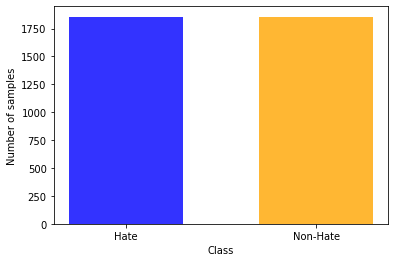

In [56]:
plt.bar(x=['Hate', 'Non-Hate'], height=[first, second],  color=['blue', 'orange', 'red'], width=0.6, alpha=0.8, )
plt.ylabel('Number of samples')
plt.xlabel('Class')
plt.savefig('/hasoc_distro.png', dpi=700)
plt.show()

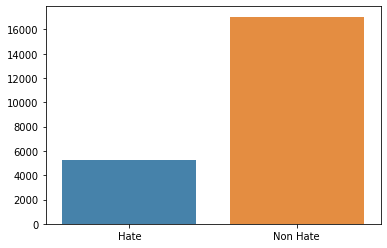

In [ ]:
import seaborn as sns

sns.barplot(x=['Hate', 'Non Hate'], y=[second, first], palette='tab10', alpha=0.9)